# Assignment 2: Regression, Multi-class, and Hyper-parameter Tuning

### Task 1: Regression Metrics (30 points total)

The code below executes the following steps:
* Load the California Housing dataset from sklearn.
* Split the dataset into training and testing sets.
* Train a linear regression model on the training data.

It is your task to:
* Evaluate the model's performance using Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared metrics.
* Print the evaluation results.
* Interpret the results and discuss how each metric reflects the performance of a regression model.

In [3]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the Boston Housing dataset
housing = fetch_california_housing()
X, y = housing.data, housing.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_true = [3, -0.5, 2, 7, 4.2]
y_pred = [2.5, 0.0, 2, 8, 4.1]

# Evaluate model performance
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

Mean Absolute Error (MAE): 0.4200000000000001
Mean Squared Error (MSE): 0.302
R-squared (R²): 0.9506406903765691


**Question: Interpret the results. How might we interpret the model performance and communicate it to stakeholders? (20 points)**



*Your Answer:*
The 0.95 R score is a good metric for accuracy, suggesting we can have a 95% confidence in this model and it can serve as a reliable filter for our targeted information. Instead of hiring 10 more employees, we can instead hire 2 to work in tandem with this model, allowing it to do the tedious work while the 2 data scientist properly supervise and deligate the information to approprate personale.

### Task 2: Multiclass Classification Metrics (30 points total)

The code below executes the following steps:
* Load the Iris dataset from scikit-learn.
* Split the dataset into training and testing sets.
* Train a multiclass classification model, logistic regression, on the training data.

It is your task to:
* Evaluate the model's performance using precision, recall, F1 score
* Visualize a confusion matrix.
* Print the evaluation results.
* Interpret the results and discuss how each metric reflects the performance of a regression model.

Precision: 0.80
Recall: 0.67
F1 Score: 0.73


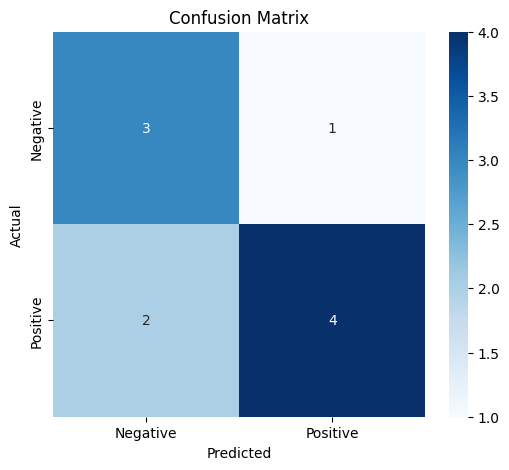

In [8]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_true = [1, 0, 1, 1, 0, 1, 0, 1, 0, 1]
y_pred = [1, 0, 1, 0, 0, 1, 1, 1, 0, 0]

# Evaluate model performance
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Question: Interpret the results. How might we interpret the model performance and communicate it to stakeholders? (20 points)**


*Your Answer:*
This model shows promise of being usable and is worth puting more data into to determine its viability, as it is now, it is proforming above average without showing any obvious biases. For using such a small dataset, this is about the best case senario for a reasilistic and practical model.

### Task 3: Model Selection, Hyperparameter Tuning, and Cross-Validation (40 points total)
The code below executes the following steps:
* Load in the Iris dataset.
* Split into training and testing

It is your task to:
* Implement a grid search with cross-validation to tune hyperparameters for a classification model (e.g. random forest).
* Explore different hyperparameters (e.g. number of estimators for random forest).
* Evaluate the model's performance using accuracy, precision, recall, and F1 score on the testing set.
* Print the **best hyperparameters** and evaluation results.

In [13]:
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target
y = (y == 0).astype(int) # convert it to a binary because I couldn't get it to work otherwise

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid
rf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Hyperparameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


Not entirely sure if all 1's means I made it that awesome or very flawed, I tinkered around with it until it worked and thats what came up.

### OPTIONAL Task 4: Custom Scoring Metric (20 bonus points)

In sklearn, you are not limited to using their scoring functions. You can create your own!

You can create a custom scoring metric in scikit-learn by defining a scoring function and then using the `make_scorer` function to wrap it as a scorer.

**For bonus points:**

* Define a custom scoring function custom_scoring that calculates the weighted sum of precision and recall for a binary classification problem.
* Then wrap this function using make_scorer to create a custom scorer custom_scorer.
* Use this custom scorer in cross-validation to evaluate the performance of a logistic regression model.

In [30]:
from sklearn.metrics import make_scorer, precision_score, recall_score
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
import numpy as np

# Define your custom scoring function
def custom_scoring(y_true, y_pred, precision_weight = 0.6, recall_weight = 0.4):
    # YOUR CODE HERE
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    return score

# Wrap the custom scoring function as a scorer
custom_scorer = make_scorer(custom_scoring)

# YOUR CODE HERE



In [31]:
# THIS CODE TESTS YOUR FUNCTION
# Generate sample data
X, y = make_classification(n_samples=100, n_features=10, n_redundant=5, random_state=42)

# Create and train a model using cross-validation
model = LogisticRegression(max_iter=1000)
scores = cross_val_score(model, X, y, cv=5, scoring=custom_scorer)

# Print the custom scores obtained from cross-validation
print("Custom Scores:", scores)
print("Mean Custom Score:", scores.mean())

ValueError: scoring must return a number, got [nan nan nan nan nan] (<class 'numpy.ndarray'>) instead. (scorer=score)